# KNN for  k = 3

In [1]:
import numpy as np
from scipy import io
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import math

In [2]:
data = io.loadmat('D:\Courses\Fall 19\ELEG 815 Statistical Learning\HW4\Homework4Files\H3Data.mat')

In [9]:
dataMat = data['Datamat']
queryMat = data['Querymat']
dfM = pd.DataFrame(dataMat)
dfQ = pd.DataFrame(queryMat)

In [4]:
def KNN(dataMat,test,k):
    neighbours = [math.inf]*k
    N0 = [math.inf]*k
    for i in range(len(dataMat)):
        xi = dataMat[i][:len(dataMat[0])-1]
        dist = sp.spatial.distance.euclidean(xi,test)
        max_neighbour = max(neighbours)
        if dist < max_neighbour:
            ind = neighbours.index(max_neighbour)
            neighbours[ind] = dist
            N0[ind] = dataMat[i]
    classes = [1,2,3]
    Prob = [0]*len(classes)
    for i in range(len(classes)):
        cnt = 0
        for j in range(len(N0)):
            if N0[j][2] == classes[i]:
                cnt += 1
        Prob[i] = cnt/k
    Max_Prob = max(Prob)
    Index_Max_Prob = Prob.index(Max_Prob)
    return classes[Index_Max_Prob]
Pred_Class = KNN(dataMat,queryMat[0],3)

# Predictions for k=3

In [8]:
def Test(queryMat,dataMat):
    predictions = [None]*len(queryMat)
    for i in range(len(queryMat)):
        pred = KNN(dataMat,queryMat[i],3)
        predictions[i] = pred
    return predictions
predictions = Test(queryMat,dataMat)
print('Predictions :',predictions)

Predictions : [3, 1, 2, 1, 2, 1, 1, 1, 3, 2, 3, 1, 1, 3, 3, 3, 1, 3, 2, 2]


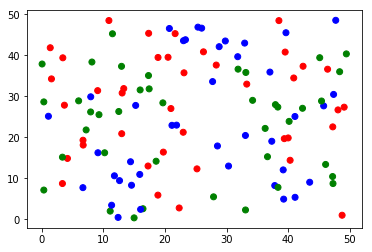

In [6]:
colors = ['r','g','b']
plt.scatter(dfM[0],dfM[1],c=dfM[2],cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(dfQ[0],dfQ[1],c=predictions,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

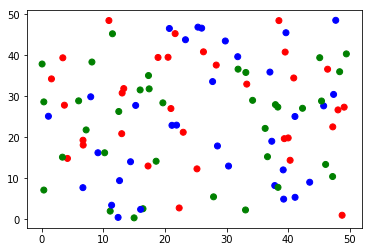

In [7]:
plt.scatter(dfM[0],dfM[1],c=dfM[2],cmap=matplotlib.colors.ListedColormap(colors))
#plt.scatter(dfQ[0],dfQ[1],c=predictions,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()